In [51]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as mplot

# set options
pd.options.display.float_format = '{:20,.2f}'.format

# Data files for analysis
mouse_meta_data_file = "Data/mouse_metadata.csv"
mouse_study_results_file = "Data/study_results.csv"

#Read data files
mouse_meta_data_df = pd.read_csv(mouse_meta_data_file)
mouse_study_results_df = pd.read_csv(mouse_study_results_file)

#Remove Mouse with duplicate time points
mouse_study_results_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)

#merge meta data with study results
mouse_meta_study_df = pd.merge(mouse_study_results_df, mouse_meta_data, how="left", on=["Mouse ID"])

mouse_meta_study_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,f932,0,45.00,0,Ketapril,Male,15,29
2,g107,0,45.00,0,Ketapril,Female,2,29
3,a457,0,45.00,0,Ketapril,Female,11,30
4,c819,0,45.00,0,Ketapril,Male,21,25


In [52]:
#Generate summary statistics for each drug regimen
drug_regimen_df = mouse_meta_study_df.groupby(['Drug Regimen'])

drug_regimen_stats_df = pd.DataFrame({
    "Tumor Volume[mean]": drug_regimen_df["Tumor Volume (mm3)"].mean(),    
    "Tumor Volume[median]": drug_regimen_df["Tumor Volume (mm3)"].median(),
    "Tumor Volume[Variance]": drug_regimen_df["Tumor Volume (mm3)"].var(),
    "Tumor Volume[std]": drug_regimen_df["Tumor Volume (mm3)"].std(),
    "Tumor Volume[sem]": drug_regimen_df["Tumor Volume (mm3)"].sem(),
})

drug_regimen_stats_df

,Tumor Volume[mean],Tumor Volume[median],Tumor Volume[Variance],Tumor Volume[std],Tumor Volume[sem]
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


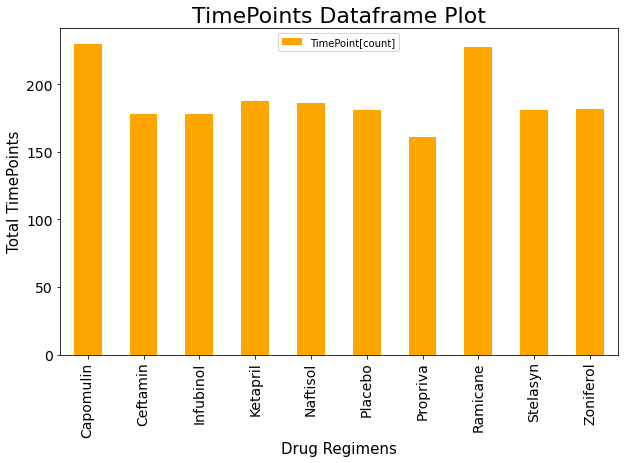

In [100]:
# Generate bar plot for each drug regimen vs total number of time points 
drug_regimen_timepoint_df = pd.DataFrame({
    "TimePoint[count]":drug_regimen_df["Timepoint"].count()
})

df_axis = drug_regimen_timepoint_df.plot(kind='bar', title='TimePoints Dataframe Plot', ylabel='Total Timepoints',
         xlabel='Drug Regimen', figsize=(10, 6), color='orange', fontsize=14)
df_axis.set_title("TimePoints Dataframe Plot", fontsize=22)
df_axis.set_ylabel("Total TimePoints", fontsize=15);
df_axis.set_xlabel("Drug Regimens", fontsize=15);

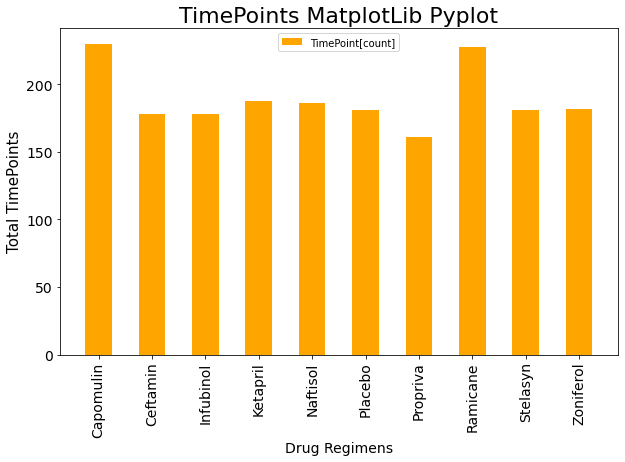

In [144]:
# Generate bar plot [Pyplot] for each drug regimen vs total number of time points 

#drug_regimen_names = drug_regimen_df.groups.keys()
drug_regimen_names = [name for name, temp_df in drug_regimen_df ]
total_timepoints = drug_regimen_df['Timepoint'].count()

#chart = mplot.figure()
chart, axis = mplot.subplots(figsize=(10,6))
#axis = chart.add_axes([0,0,1,1])
axis.bar(drug_regimen_names, total_timepoints, color='orange', label='TimePoint[count]', width=0.5)
axis.set_title("TimePoints MatplotLib Pyplot", fontsize=22)
axis.set_ylabel("Total TimePoints", fontsize=15);
axis.set_xlabel("Drug Regimens", fontsize=14);
axis.legend(loc='upper center')
mplot.xticks(rotation=90, fontsize=14)
mplot.yticks(fontsize=14)
mplot.show()

In [170]:
drug_regimen_mouse_df = mouse_meta_study_df.groupby(['Drug Regimen', 'Mouse ID'], as_index=False)

drug_regimen_mouse_max_timepoint = drug_regimen_mouse_df['Timepoint'].max()

drug_regimen_mouse_final_tumor_volume_df = pd.merge(drug_regimen_mouse_max_timepoint,mouse_meta_study_df,how='inner',on=['Drug Regimen', 'Mouse ID', 'Timepoint'])

drug_regimen_mouse_final_tumor_volume_df = drug_regimen_mouse_final_tumor_volume_df[[
    'Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)'
]]

promising_treatment_regimens = [
    'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

drug_regimen_mouse_final_tumor_volume_df = drug_regimen_mouse_final_tumor_volume_df[
    drug_regimen_mouse_final_tumor_volume_df['Drug Regimen'].isin(
    promising_treatment_regimens)
]

drug_regimen_mouse_final_tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.98
1,Capomulin,b742,45,38.94
2,Capomulin,f966,20,30.49
3,Capomulin,g288,45,37.07
4,Capomulin,g316,45,40.16
...,...,...,...,...
195,Ramicane,s508,45,30.28
196,Ramicane,u196,45,40.67
197,Ramicane,w678,5,43.17
198,Ramicane,y449,15,44.18
